In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from single_population_discrete import SinglePopulationDiscrete
from aux import subplots1D

%load_ext autoreload

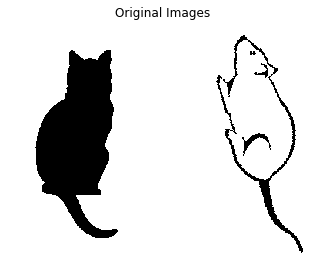

In [2]:
# Load raw images
img1 = (mpimg.imread('img/cat3.png')[:,:,0] > 0.5).astype(int)
img2 = (mpimg.imread('img/mouse3.png')[:,:,0] > 0.5).astype(int)
# img1 = mpimg.imread('img/cat2.png')
# img2 = mpimg.imread('img/rat2.png')

# Plot raw images
fig, axis = plt.subplots(ncols=2)
axis[0].imshow(img1, cmap='gray')
axis[1].imshow(img2, cmap='gray')
axis[0].set_axis_off()
axis[1].set_axis_off()
plt.suptitle('Original Images');

Number of neurons is 55204


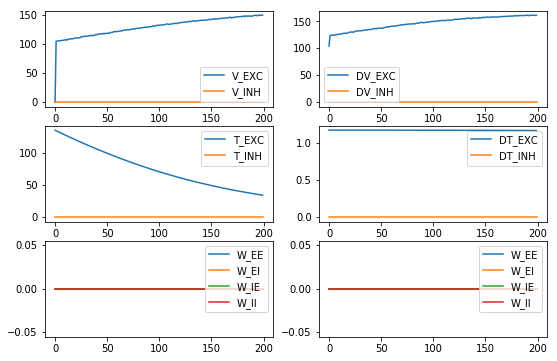

In [3]:
############################################
# Initialize a network with no synapses
############################################
N_NEURON = img1.shape[0] * img1.shape[1]
print('Number of neurons is', N_NEURON)

param = {
    'N_EXC' : N_NEURON,
    'N_INH' : 0,

    'T_RANGE_EXC' : [0.0, 1.0],
    'T_RANGE_INH' : [0.0, 1.0],
    
    'IP_RATE_EXC' : 0.01,
    'IP_RATE_INH' : 0.01,
    'V_EQ_EXC' : 0.5,
    'V_EQ_INH' : 0.5,

    'WITH_SYNAPSES' : False
}

spd1 = SinglePopulationDiscrete(param)


############################################
# Run the network with no input, only noise
############################################
VI_MAT_NOISE = np.zeros((200, N_NEURON))

param_sim_noise = {
    'WITH_IP'       : True,
    'WITH_SP'       : False,
    'SOMA_NOISE'    : {'EXC' : [0.0, 0.5], 'INH' : [0.0, 0.5]}
}

spd1.run(VI_MAT_NOISE, param_sim_noise)

# Plot network indicators
plotStruct = np.array([
    [['V_EXC', 'V_INH'], ['DV_EXC', 'DV_INH']],
    [['T_EXC', 'T_INH'], ['DT_EXC', 'DT_INH']],
    [['W_EE', 'W_EI', 'W_IE', 'W_II'],
    ['W_EE', 'W_EI', 'W_IE', 'W_II']]])

subplots1D(spd1.statsDict, plotStruct)

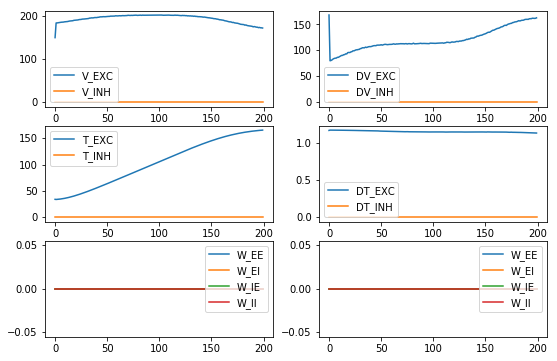

In [4]:
############################################
# Run the network by feeding in the cat 100 times
############################################
VI_MAT_CAT = np.tile(np.ndarray.flatten(img1), (200, 1))

param_sim_img = {
    'WITH_IP'       : True,
    'WITH_SP'       : False,
    'SOMA_NOISE'    : {'EXC' : [0.0, 0.1], 'INH' : [0.0, 0.1]}
}

spd1.run(VI_MAT_CAT, param_sim_img)

subplots1D(spd1.statsDict, plotStruct)

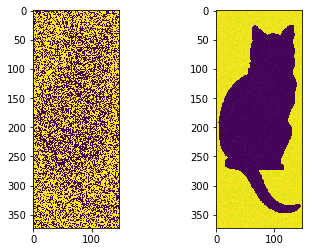

In [5]:
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(spd1.V['EXC'].reshape(img1.shape))
ax[1].imshow(spd1.T['EXC'].reshape(img1.shape))
plt.show()

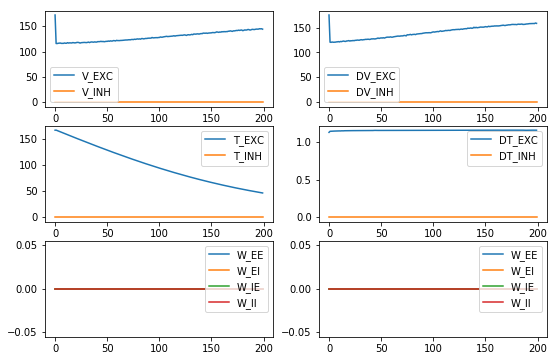

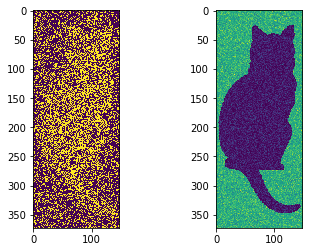

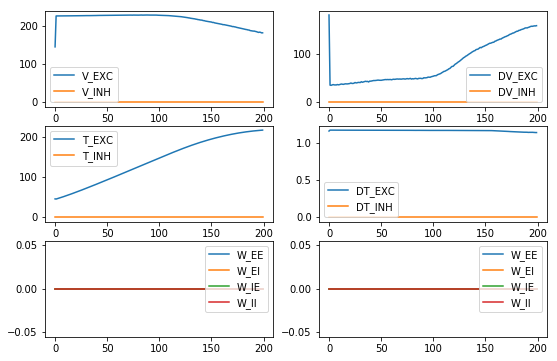

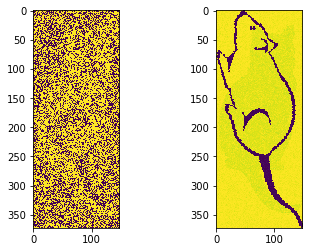

In [6]:
############################################
# Show more noise, then show more 
############################################

VI_MAT_MOUSE = np.tile(np.ndarray.flatten(img2), (200, 1))

spd1.run(VI_MAT_NOISE, param_sim_noise)

subplots1D(spd1.statsDict, plotStruct)

fig, ax = plt.subplots(ncols=2)
ax[0].imshow(spd1.V['EXC'].reshape(img1.shape))
ax[1].imshow(spd1.T['EXC'].reshape(img1.shape))
plt.show()

spd1.run(VI_MAT_MOUSE, param_sim_img)

subplots1D(spd1.statsDict, plotStruct)

fig, ax = plt.subplots(ncols=2)
ax[0].imshow(spd1.V['EXC'].reshape(img1.shape))
ax[1].imshow(spd1.T['EXC'].reshape(img1.shape))
plt.show()